In [1]:
#Импорт необходимых модулей
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
from celluloid import Camera
import plotly.graph_objects as go
import warnings

In [2]:
#Считывание таблицы данных
df_P = pd.read_excel("database/f221117_111205-P.xlsx", header=None)
df_P

0          1           2           3           4           5    \
0           Kmob   52.53006   52.482506   52.262215   52.522243   52.466194   
1        AdcFreq   40.00000   40.000000   40.000000   40.000000   40.000000   
2       SpeStart  800.00000  800.000000  800.000000  800.000000  800.000000   
3     TimeOffset    0.00000  163.540909  321.232246  480.819946  640.055946   
4              0   -1.00000    0.000000    1.000000    0.000000    0.000000   
...          ...        ...         ...         ...         ...         ...   
1999        1995 -157.00000 -153.000000 -141.000000 -141.000000 -132.000000   
2000        1996 -167.00000 -162.000000 -149.000000 -148.000000 -139.000000   
2001        1997 -143.00000 -137.000000 -127.000000 -130.000000 -124.000000   
2002        1998 -118.00000 -111.000000 -106.000000 -114.000000 -111.000000   
2003        1999 -116.00000 -109.000000 -103.000000 -108.000000 -109.000000   

             6           7            8            9    ...           141  \
0      52.520100   52.759769    52.483208    52.531464  ...     52.378502   
1      40.000000   40.000000    40.000000    40.000000  ...     40.000000   
2     800.000000  800.000000   800.000000   800.000000  ...    800.000000   
3     801.828194  959.930260  1120.055412  1281.420082  ...  22453.454840   
4       1.000000   -1.000000    -4.000000    -8.000000  ...    -17.000000   
...          ...         ...          ...          ...  ...           ...   
1999 -123.000000 -122.000000  -115.000000  -119.000000  ...    -99.000000   
2000 -129.000000 -126.000000  -120.000000  -125.000000  ...   -100.000000   
2001 -113.000000 -113.000000  -112.000000  -116.000000  ...    -99.000000   
2002 -100.000000 -100.000000   -99.000000  -106.000000  ...   -102.000000   
2003  -99.000000 -100.000000  -103.000000  -109.000000  ...   -102.000000   

               142           143           144           145           146  \
0        52.531498     52.483936     52.543571     52.611885     52.513020   
1        40.000000     40.000000     40.000000     40.000000     40.000000   
2       800.000000    800.000000    800.000000    800.000000    800.000000   
3     22613.910177  22772.996420  22945.700239  23105.662603  23255.156668   
4       -15.000000    -18.000000    -17.000000    -17.000000    -14.000000   
...            ...           ...           ...           ...           ...   
1999    -99.000000   -104.000000   -104.000000    -99.000000    -95.000000   
2000   -100.000000   -108.000000   -107.000000   -100.000000    -97.000000   
2001   -100.000000   -105.000000   -105.000000   -100.000000    -99.000000   
2002   -101.000000   -107.000000   -107.000000   -102.000000   -101.000000   
2003   -103.000000   -107.000000   -107.000000   -103.000000   -103.000000   

               147           148           149           150  
0        52.533607     52.496689     52.554211     52.520100  
1        40.000000     40.000000     40.000000     40.000000  
2       800.000000    800.000000    800.000000    800.000000  
3     23414.527876  23576.406301  23736.491392  23896.311575  
4       -15.000000    -15.000000    -18.000000    -17.000000  
...            ...           ...           ...           ...  
1999    -97.000000   -100.000000    -97.000000    -94.000000  
2000   -100.000000   -101.000000   -100.000000    -95.000000  
2001   -101.000000   -101.000000   -102.000000    -98.000000  
2002   -103.000000   -102.000000   -105.000000   -101.000000  
2003   -104.000000   -102.000000   -105.000000    -99.000000  

[2004 rows x 151 columns]

In [3]:
#Разбиение данных на 3 таблицы
#Значения времени(X_P)
X_P = df_P.iloc[3, 1:]
frames_ammount = X_P.shape[0]
#Значения компенсационного заряда(Y_P)
Y_P = df_P.iloc[4:, 0]
#Значения ионного тока(Z_P)
Z_P = df_P.iloc[4:, 1:]
print(f"X:{X_P.shape}\nY:{Y_P.shape}\nZ{Z_P.shape}")
print(Z_P.reset_index(drop=True))

X:(150,)
Y:(2000,)
Z(2000, 150)
        1      2      3      4      5      6      7      8      9      10   \
0      -1.0    0.0    1.0    0.0    0.0    1.0   -1.0   -4.0   -8.0   -7.0   
1     -11.0  -11.0   -7.0   -8.0   -8.0   -7.0  -12.0  -12.0  -17.0  -15.0   
2       0.0   -1.0    0.0   -1.0   -2.0   -2.0  -11.0  -12.0  -14.0  -11.0   
3     -12.0  -14.0  -10.0  -12.0  -12.0  -12.0  -18.0  -20.0  -20.0  -18.0   
4     -17.0  -17.0  -14.0  -15.0  -15.0  -14.0  -21.0  -23.0  -23.0  -21.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995 -157.0 -153.0 -141.0 -141.0 -132.0 -123.0 -122.0 -115.0 -119.0 -116.0   
1996 -167.0 -162.0 -149.0 -148.0 -139.0 -129.0 -126.0 -120.0 -125.0 -119.0   
1997 -143.0 -137.0 -127.0 -130.0 -124.0 -113.0 -113.0 -112.0 -116.0 -112.0   
1998 -118.0 -111.0 -106.0 -114.0 -111.0 -100.0 -100.0  -99.0 -106.0 -106.0   
1999 -116.0 -109.0 -103.0 -108.0 -109.0  -99.0 -100.0 -103.0 -109.0 -109.0   

      ...    141    142    143 

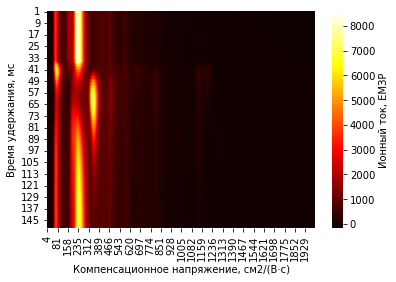

In [4]:
#Отрисовка карты нагрева первоначальных данных
fig, ax = plt.subplots()
raw_heatmap = sns.heatmap(Z_P.transpose(), cmap="hot", cbar_kws={'label': 'Ионный ток, ЕМЗР'}, ax=ax)
raw_heatmap.set(xlabel=('Компенсационное напряжение, см2/(В·c)'),
ylabel=('Время удержания, мс'))
fig.savefig('results/raw_heatmap.png')

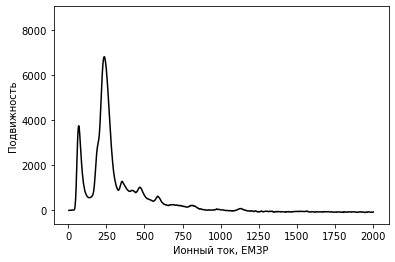

In [5]:
fig, ax = plt.subplots()
camera = Camera(fig)
plt.xlabel('Ионный ток, ЕМЗР')
plt.ylabel('Подвижность')
for i in range(125):
    plt.plot(Z_P.iloc[:,i], color = "black")
    camera.snap()

animation = camera.animate()
animation.save('results/anim_raw_data.gif', writer='pillow')

In [7]:
surf = go.Figure(data=[go.Surface(z=Z_P.values)])
surf.add_annotation(ax = X_P)
surf.update_layout(autosize=False,
                scene = dict(
                    xaxis_title='Something',
                    yaxis_title='Time',
                    zaxis_title='Z AXIS TITLE'),
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

In [8]:
from scipy.linalg import cholesky
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_arPLS(y, lam=1e4, ratio=0.05, itermax=100):
    N = len(y)
    D = sparse.eye(N, format='csc')
    D = D[1:] - D[:-1]
    D = D[1:] - D[:-1]
    H = lam * D.T * D
    w = np.ones(N)
    for i in range(itermax):
        W = sparse.diags(w, 0, shape=(N, N))
        WH = sparse.csc_matrix(W + H)
        C = sparse.csc_matrix(cholesky(WH.todense()))
        z = spsolve(C, spsolve(C.T, w * y))
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        wt = 1. / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        if np.linalg.norm(w - wt) / np.linalg.norm(w) < ratio:
            break
        w = wt
    return z

[-29. -28. -20. ... -87. -90. -85.]


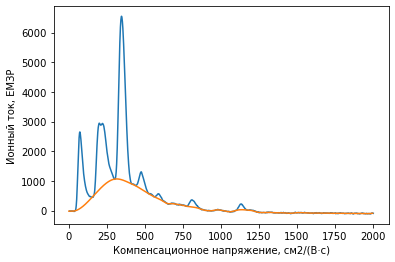

In [9]:
warnings.filterwarnings('ignore')

frame = 70
fig, ax = plt.subplots()
plt.plot(Z_P.iloc[:, frame])
print(Z_P.iloc[:, 100].to_numpy())
baseline_Zi = baseline_arPLS(Z_P.iloc[:, frame].to_numpy(), 10**4, 0.01)
plt.plot([i for i in range(0, 2000)], baseline_Zi)
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
fig.savefig(f'results/frame_{frame}_with_baseline.png')


plt.show()

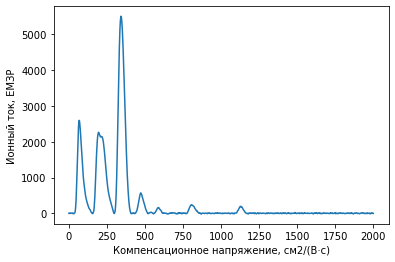

In [10]:
fig, ax = plt.subplots()
plt.plot([i for i in range(0, 2000)], Z_P.iloc[:, 70] - baseline_Zi)
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
plt.show()
fig.savefig(f'results/processed_{frame}_frame.png')

In [11]:
arPLS_dz = []
for i in tqdm(range(150)):
    new_line = Z_P.iloc[:,i] - baseline_arPLS(Z_P.iloc[:, i].to_numpy(), 10**4, 0.01)
    arPLS_dz.append(new_line.to_numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [04:49<00:00,  1.93s/it]


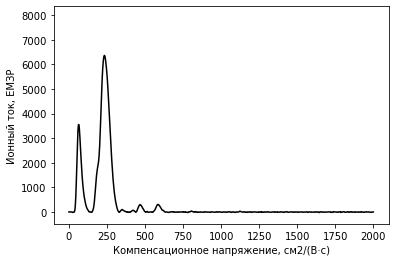

In [12]:
fig, ax = plt.subplots()
camera = Camera(fig)
plt.xlabel('Компенсационное напряжение, см2/(В·c)')
plt.ylabel('Ионный ток, ЕМЗР')
for i in arPLS_dz:
    plt.plot(i, color = "black")
    camera.snap()

animation = camera.animate()
animation.save('results/anim_processed_data.gif', writer = 'pillow')

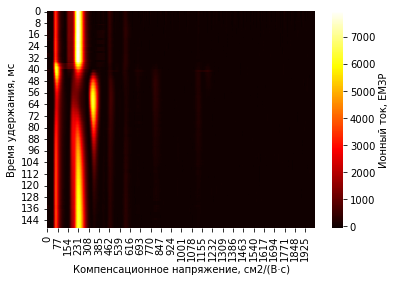

In [13]:
fig, ax = plt.subplots()
arPLS_Z = pd.DataFrame(arPLS_dz)
processed_heatmap = sns.heatmap(arPLS_Z, cmap="hot", cbar_kws={'label': 'Ионный ток, ЕМЗР'}, ax=ax)
processed_heatmap.set(xlabel=('Компенсационное напряжение, см2/(В·c)'),
ylabel=('Время удержания, мс'))
fig.savefig('results/processed_heatmap.png')

In [16]:
arPLS_Z.to_csv('results/arPLS_Z.csv')
X_P.to_csv('results/X.csv')
Y_P.to_csv('results/Y.csv')
Z_P.to_csv('results/Z.csv')